# Ejercicio de análisis de datos

Análisis de datos fuente a consultar [Nasa](https://eclipse.gsfc.nasa.gov/eclipse.html), que referencian los eclipses ocurridos o predichos entre 1970 y 2020. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from IPython.core.display import HTML

CSS = """
.output_html {
    display: flex;
  justify-content: center;
  }
  
table {
  align-self: center;
 width:600px;
}


.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
"""
HTML('<style>{}</style>'.format(CSS))


In [38]:
datos = pd.read_csv('Eclipses_rd.csv')
info = (open("keys.info")).readlines()
info = [key.strip("\n") for key in info]
datos_copy = datos.copy()
num_datos = datos.shape[0]
print("El número de datos es",num_datos,"eclipses")
print("Las columnas son:")
desc=pd.DataFrame({"Info Columna":info},index=datos.columns)
pd.set_option('max_colwidth', 200)
desc

El número de datos es 164 eclipses
Las columnas son:


,Info Columna
Calendar Date,This column gives the Calendar Date of the instant on greatest eclipse.
TD of Greatest Eclipse,In this column TD of Greatest Eclipse is the Terrestrial Dynamical Time when the axis of the Moon's shadow passes closest to Earth's center.
Eclipse Type,"This column lists the Eclipse Type which is either Total, Annular, Hybrid or Partial."
Eclipse Magnitude,The Eclipse Magnitude gives the fraction of the Sun's diameter obscured at the instant of greatest eclipse.
Central Duration,For total and annular eclipses the Central Duration gives the length of the eclipse as seen from the central line at greatest eclipse.


# ¿Cuántos eclipses hay por cada tipo?

Para resolver este problema simplemente debemos agrupar los datos por los tipos de eclipses y selecionar cualquiera de las otras columnas. Para que el resultado sea mejor creamos un tabla llamada freq y una pequeña gráfica

In [62]:
freq = datos.groupby(datos['Eclipse Type']).count()['Calendar Date']
freq = pd.DataFrame({"Count":freq.values},index=freq.index)
freq

,Count
Eclipse Type,
Annular,59
Hybrid,8
Partial,40
Total,57


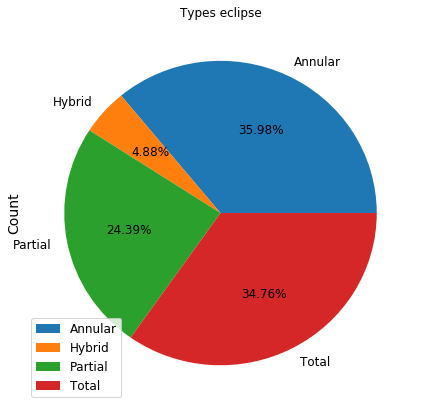

In [63]:
fig = freq.plot.pie(y='Count', 
                    figsize=(7, 7),
                    title="Types eclipse",
                    autopct='%.2f%%')
fig = fig.legend(loc='lower left')

El segundo punto es hallar la cantida de eclipses por día (sólo en día no la fecha entera) y hallar el día en donde más se repiten eclipes.

In [65]:
datos_dt = pd.to_datetime(datos['Calendar Date'])
day_freq_max = datos_dt.dt.day.mode()
freq_day = np.unique(np.array(datos_dt.dt.day),return_counts=True)
num_day_freq_max=freq_day[1][day_freq_max-1]
print("Día",day_freq_max[0],"con",num_day_freq_max[0],"eclipses")

Día 11 con 13 eclipses


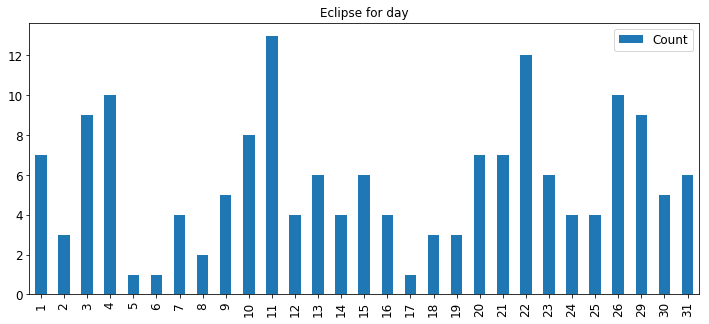

In [70]:
count_day = pd.DataFrame({'Count':freq_day[1]},index=freq_day[0])
fig = count_day.plot.bar(figsize=(12, 5),
                            title="Eclipse for day",)

In [71]:
freq_year = np.unique(np.array(datos_dt.dt.year),return_counts=True)
freq_year =np.array(freq_year)
last_year = max(freq_year[0])
first_year = min(freq_year[0])
decadas = (last_year-first_year)//10
val = {}
for i in range(0,decadas+1):
    key = "%d-%d"%((first_year+i*10),(first_year+10*(i+1)))
    val[key]=(freq_year[:,i*10:(i+1)*10].sum(axis=1)[1])
val

{'1971-1981': 22,
 '1981-1991': 36,
 '1991-2001': 36,
 '2001-2011': 36,
 '2011-2021': 34}

In [205]:
datos_dt2 = pd.to_datetime(datos['TD of Greatest Eclipse'])
data = pd.DataFrame({'mes':datos_dt.dt.month,'hora':datos_dt2.dt.hour})
cond = (data['hora']>=8) & (data['hora']<=11) & (data['mes']==9)
print("Entre 8 y 11 am en septiembre hubiero",data[cond].count()['mes'],"eclipses")

Entre 8 y 11 am en septiembre hubiero 4 eclipses


In [206]:
datoscd = datos['Central Duration'].str.replace('-','00:00')
datoscd = datoscd.str.replace('s','')
datoscd = datoscd.str.replace('m',':')
datoscd = '00:' + datoscd
datos['Central Duration seg'] = pd.to_datetime(datoscd).dt.minute*60 +pd.to_datetime(datoscd).dt.second
datos.groupby(datos['Eclipse Type']).mean()

,Eclipse Magnitude,Central Duration seg
Eclipse Type,,
Annular,0.958559,274.406780
Hybrid,1.006000,37.500000
Partial,0.704050,0.000000
Total,1.044684,220.526316
